In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('powergrid_material_demand_latest.csv')

In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    if col != 'Project_ID':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [5]:
input_features = [
    'Location', 'Geographic_Region', 'Tower_Count', 'Substations_Count',
    'Tower_Type', 'Substation_Type', 'Tax_Rate', 'Line_Length_CKM',
    'Transformation_Capacity_MVA', 'Budget_Cr'
]
output_features = [
    'Steel_Demand_Tons', 'Conductor_Demand_Km',
    'Insulator_Demand_Nos', 'Transformer_Demand_Units'
]

X = df[input_features]
y = df[output_features]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
models = {}
for i, col in enumerate(output_features):
    print(f"Training model for: {col}")
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train.iloc[:, i])
    models[col] = model

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test.iloc[:, i], y_pred)
    r2 = r2_score(y_test.iloc[:, i], y_pred)
    print(f"MSE: {mse:.2f}")
    print(f"R2: {r2:.4f}")
    print('-'*30)

Training model for: Steel_Demand_Tons
MSE: 34928049.57
R2: 0.9841
------------------------------
Training model for: Conductor_Demand_Km
MSE: 314.88
R2: 1.0000
------------------------------
Training model for: Insulator_Demand_Nos
MSE: 50415868.00
R2: 0.9977
------------------------------
Training model for: Transformer_Demand_Units
MSE: 0.67
R2: 0.5015
------------------------------


In [14]:
for col in output_features:
    print(f"Feature importances for {col}:")
    importances = models[col].feature_importances_
    s = pd.Series(importances, index=input_features)
    s = s.sort_values(ascending=False)
    for feat, score in s.items():
        print(f"{feat}: {score:.4f}")
    print()

Feature importances for Steel_Demand_Tons:
Tower_Count: 0.9555
Tower_Type: 0.0137
Transformation_Capacity_MVA: 0.0095
Budget_Cr: 0.0062
Line_Length_CKM: 0.0053
Geographic_Region: 0.0025
Substation_Type: 0.0023
Tax_Rate: 0.0018
Substations_Count: 0.0017
Location: 0.0016

Feature importances for Conductor_Demand_Km:
Tower_Count: 0.5499
Tower_Type: 0.3336
Line_Length_CKM: 0.1158
Transformation_Capacity_MVA: 0.0005
Budget_Cr: 0.0001
Substations_Count: 0.0000
Substation_Type: 0.0000
Location: 0.0000
Geographic_Region: 0.0000
Tax_Rate: 0.0000

Feature importances for Insulator_Demand_Nos:
Tower_Type: 0.7281
Tower_Count: 0.2635
Substation_Type: 0.0039
Budget_Cr: 0.0024
Line_Length_CKM: 0.0011
Transformation_Capacity_MVA: 0.0003
Substations_Count: 0.0002
Tax_Rate: 0.0002
Location: 0.0002
Geographic_Region: 0.0002

Feature importances for Transformer_Demand_Units:
Transformation_Capacity_MVA: 0.5512
Line_Length_CKM: 0.0594
Tower_Type: 0.0576
Budget_Cr: 0.0548
Geographic_Region: 0.0495
Substatio

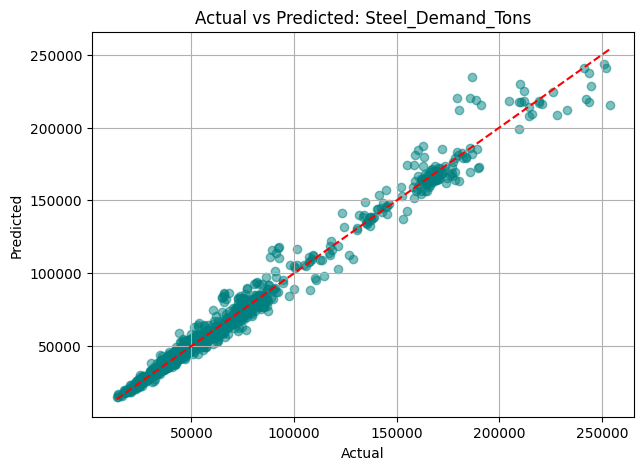

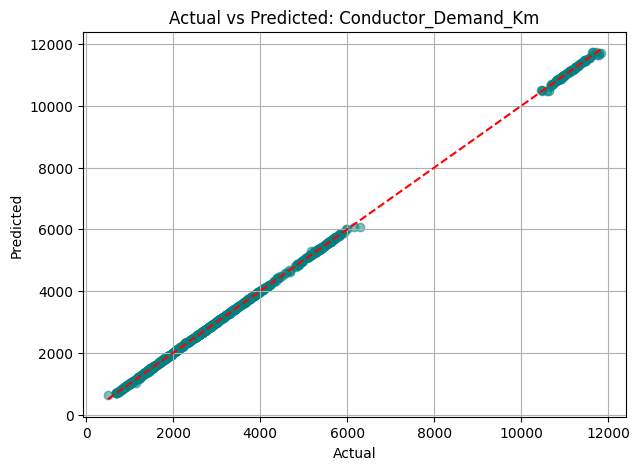

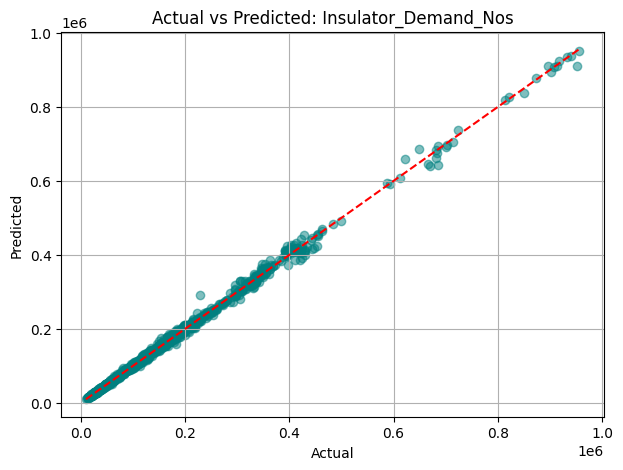

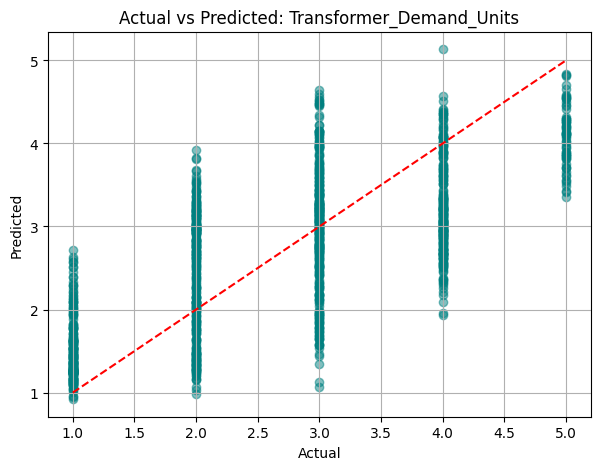

In [12]:
for i, col in enumerate(output_features):
    y_pred = models[col].predict(X_test)
    plt.figure(figsize=(7,5))
    plt.scatter(y_test.iloc[:, i], y_pred, alpha=0.5, color='teal')
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted: {col}')
    plt.grid(True)
    plt.show()